# create TOD (raw_gex)

In [2]:
table_of_droplets = DropletUtils::read10xCounts("../data/raw_feature_bc_matrix.h5")
tod <- table_of_droplets[table_of_droplets@rowRanges@elementMetadata$Type == "Gene Expression"]
tod@rowRanges@elementMetadata

DataFrame with 22040 rows and 3 columns
                      ID             Symbol            Type
             <character>        <character>     <character>
1     ENSSSCG00000028996            ALDH1A1 Gene Expression
2     ENSSSCG00000005267              ANXA1 Gene Expression
3     ENSSSCG00000005268               RORB Gene Expression
4     ENSSSCG00000005269              TRPM6 Gene Expression
5     ENSSSCG00000031382            C9orf40 Gene Expression
...                  ...                ...             ...
22036 ENSSSCG00000018087                ND4 Gene Expression
22037 ENSSSCG00000018091                ND5 Gene Expression
22038 ENSSSCG00000018092                ND6 Gene Expression
22039 ENSSSCG00000018094               CYTB Gene Expression
22040 ENSSSCG00000034846 ENSSSCG00000034846 Gene Expression

In [3]:
tod_df <- tod@assays@data@listData$counts
row.names(tod_df) <- tod@rowRanges@elementMetadata$Symbol
colnames(tod_df) <- tod@colData$Barcode
tod_df[1:10,1:10]

<10 x 10> sparse DelayedMatrix object of type "integer":
                   AAACAGCCAAACAACA-1 ... AAACAGCCAAACTGCC-1
ALDH1A1                             0   .                  0
ANXA1                               0   .                  0
RORB                                0   .                  0
TRPM6                               0   .                  0
C9orf40                             0   .                  0
CARNMT1                             0   .                  0
NMRK1                               0   .                  0
OSTF1                               0   .                  0
ENSSSCG00000045514                  0   .                  0
PCSK5                               0   .                  0

# create TOC (pyED)

In [4]:
# imported as sce (singleCellExperiment)
toc <- zellkonverter::readH5AD("../data/pyED_correct.h5ad")
toc 

Registered S3 method overwritten by 'zellkonverter':
  method                                             from      
  py_to_r.pandas.core.arrays.categorical.Categorical reticulate



class: SingleCellExperiment 
dim: 22040 8202 
metadata(1): empty_drops
assays(1): X
rownames(22040): ALDH1A1 ANXA1 ... CYTB ENSSSCG00000034846
rowData names(4): gene_ids feature_types genome interval
colnames(8202): AAACAGCCAATTGAGA-1 AAACAGCCAGTCTAGC-1 ...
  TTTGTTGGTTAGGTGC-1 TTTGTTGGTTATTGCC-1
colData names(5): Total PValue Limited LogProb FDR
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [5]:
# make to sparse matrix (dgCMatrix)
toc <- toc@assays@data@listData$X
toc

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]



22040 x 8202 sparse Matrix of class "dgCMatrix"
                                                                                              
ALDH1A1             1 . .  . .  .  .  .  . . .  .  . .  . . . .  . .  . . . . .  .  1 .  . . .
ANXA1               . . .  . .  .  .  .  . . .  .  . .  . . . .  . .  . . . . .  .  . 1  . . .
RORB                1 . .  . .  .  .  .  1 . .  .  . .  . . . .  . .  . . . . .  .  . .  . . .
TRPM6               . . .  . .  .  .  .  . . .  1  . .  . . . .  . .  . . . . .  .  . .  . . .
C9orf40             . . .  . .  .  .  .  1 . .  .  . .  . . . .  . .  . . . . .  .  . .  1 . .
CARNMT1             . . .  . .  .  .  1  . . .  1  . .  . . . .  . .  . . . . .  .  . .  1 . .
NMRK1               . . .  . .  .  .  .  . . .  .  . .  . . . .  . .  . . . . .  .  . .  . . .
OSTF1               1 . .  . .  .  .  .  . . .  .  . .  . . . .  . .  1 . . . .  1  . .  . . .
ENSSSCG00000045514  . . .  . .  .  .  .  . . .  .  . .  . . . .  . .  . . . . .  .  . .  . . .
PC

# check if toc != tod

In [6]:
sum(row.names(tod_df) != row.names(toc))

[1] 3

In [7]:
print(sum(!(row.names(tod_df) %in% row.names(toc))))
print(sum(!(row.names(toc) %in% row.names(tod_df))))

[1] 0
[1] 3


In [8]:
toc <- toc[order(row.names(toc)),]
tod_df <- tod_df[order(row.names(tod_df)),]

In [9]:
toc <- toc[row.names(toc) %in% row.names(tod_df),]

In [10]:
print(dim(toc))
print(dim(tod_df))

[1] 22037  8202
[1]  22040 722431


In [11]:
print(length(unique(row.names(toc))))
print(length(unique(row.names(tod_df))))

[1] 22037
[1] 22037


In [12]:
tod_df <- tod_df[which(!duplicated(row.names(tod_df))),]


In [13]:
sum(row.names(tod_df) != row.names(toc))

[1] 0

# create SoupChannel (sc)

In [14]:
library(SoupX)
sc = SoupChannel(tod_df, toc)
sc

Channel with 22037 genes and 8202 cells



,est,counts
,<dbl>,<dbl>
PRM1,0.038760257,164874
TNP1,0.014069912,59849
INSL3,0.010083252,42891
RPLP1,0.008199710,34879
TNP2,0.005878665,25006
ENSSSCG00000033310,0.005730793,24377
COX2,0.005244156,22307
ENSSSCG00000040470,0.004967455,21130
HSPB9,0.004596483,19552


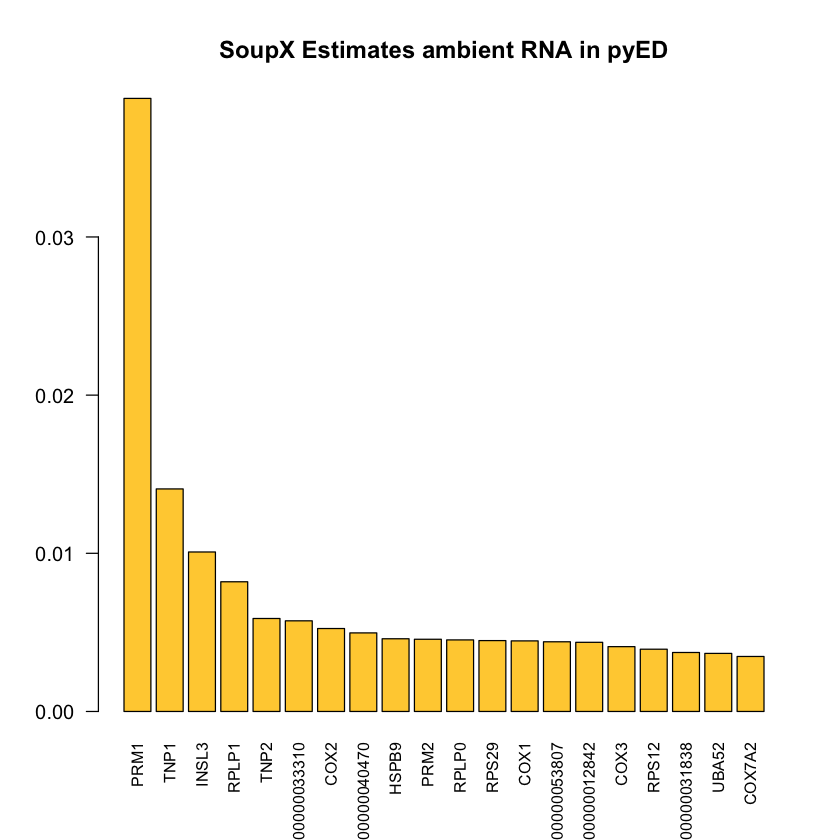

In [27]:
genelist <- head(sc$soupProfile[order(sc$soupProfile$est, decreasing = TRUE), ], n = 20)
genelist

# save the genelist as csv
write.csv(genelist, file = "04_soup/genelist.csv", row.names = FALSE)

# plot genelist as barplot
barplot(genelist$est, names.arg = rownames(genelist), las=2, cex.names = 0.8, col = "#FFCF3E", main = "SoupX Estimates ambient RNA in pyED")

# load cluster annot

In [16]:
cluster_labels_l <- read.csv("03_mapped_clusters/pyED_cluster_celltype.csv", row.names=1, check.names = FALSE)
cluster_labels_l

,cluster_type
,<chr>
AAACAGCCAATTGAGA-1,Round Stids
AAACAGCCAGTCTAGC-1,Late Scytes
AAACAGCCATCAGCAC-1,Leydig
AAACATGCAAACATAG-1,Late Scytes
AAACATGCAAGATTCT-1,Later Stids
AAACATGCACAGCCTG-1,Round Stids
AAACCAACACAAAGAC-1,Leydig
AAACCAACACAGGGAC-1,Leydig
AAACCAACATTGTCCT-1,Round Stids


In [17]:
cluster_labels_hvg_l <- read.csv("03_mapped_clusters/pyED_cluster_celltype_HVG.csv", row.names=1, check.names = FALSE)
cluster_labels_hvg_l

,cluster_type
,<chr>
AAACAGCCAATTGAGA-1,Round Stids
AAACAGCCAGTCTAGC-1,Round Stids
AAACAGCCATCAGCAC-1,Leydig
AAACATGCAAACATAG-1,Round Stids
AAACATGCAAGATTCT-1,Round Stids
AAACATGCACAGCCTG-1,Round Stids
AAACCAACACAAAGAC-1,Leydig
AAACCAACACAGGGAC-1,Leydig
AAACCAACATTGTCCT-1,Round Stids


# change cluster annot type

In [18]:
cluster_labels <- cluster_labels_l$cluster_type
names(cluster_labels) <- row.names(cluster_labels_l)

In [19]:
cluster_labels_hvg <- cluster_labels_hvg_l$cluster_type
names(cluster_labels_hvg) <- row.names(cluster_labels_hvg_l)

# run soupx with cluster annot

1085 genes passed tf-idf cut-off and 104 soup quantile filter.  Taking the top 100.

Using 58 independent estimates of rho.

Estimated global rho of 0.23

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 7 clusters to 8202 cells.



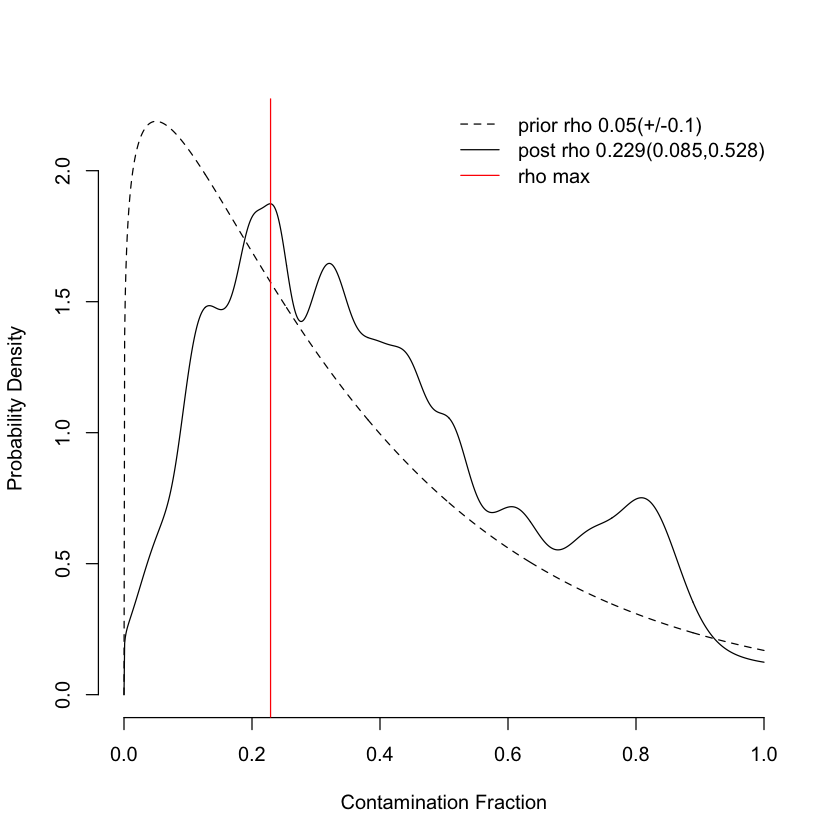

In [20]:
ac = setClusters(sc, cluster_labels)
bc = autoEstCont(ac)
#bc = setContaminationFraction(ac, frac)
#bc = nonExpressedGeneList #outdated
out = adjustCounts(bc)

81 genes passed tf-idf cut-off and 1 soup quantile filter.  Taking the top 1.

Warning message in autoEstCont(ac_hvg):
“Fewer than 10 marker genes found.  Is this channel low complexity (see help)?  If not, consider reducing tfidfMin or soupQuantile”
Warning message in estimateNonExpressingCells(sc, tmp, maximumContamination = max(contaminationRange), :
“No non-expressing cells identified.  Consider setting clusters=FALSE, increasing maximumContamination and/or FDR”
Warning message in autoEstCont(ac_hvg):
“Fewer than 10 independent estimates, rho estimation is likely to be unstable.  Consider reducing tfidfMin or increasing SoupMin.”
Using 0 independent estimates of rho.

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”




ERROR: Error in plot.window(...): need finite 'ylim' values


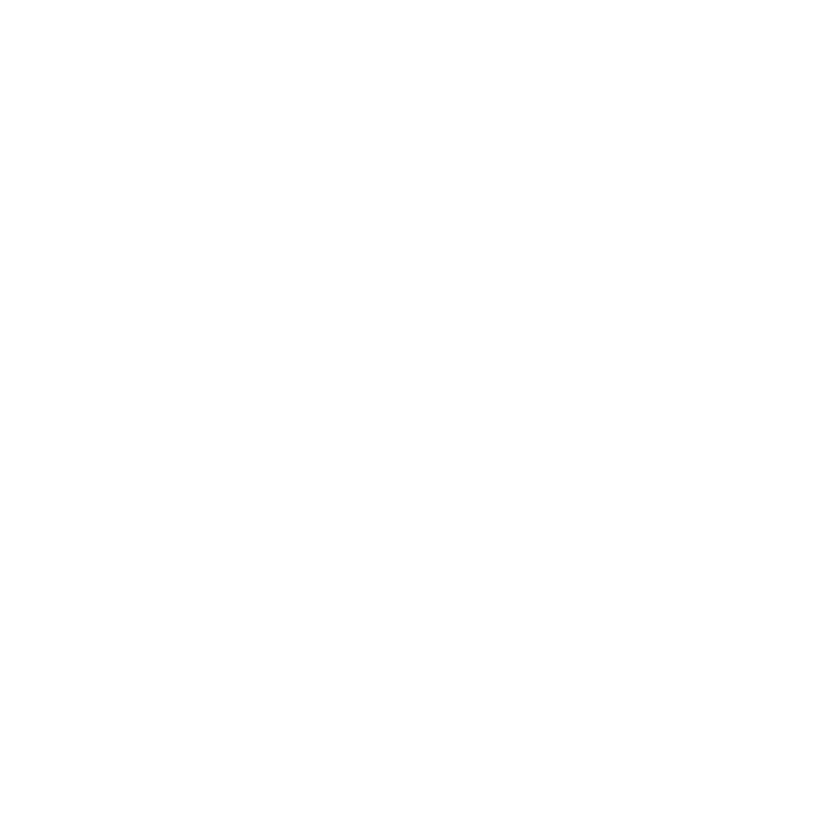

In [ ]:
ac_hvg = setClusters(sc, cluster_labels_hvg)
bc_hvg = autoEstCont(ac_hvg)
#bc_hvg = setContaminationFraction(ac_hvg, frac)
#bc_hvg = nonExpressedGeneList #outdated
out_hvg = adjustCounts(bc_hvg)

# plotting changes in PRM1

In [23]:
library(ggplot2)
library(reshape2)
library(Matrix)

No id variables; using all as measure variables

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in scale_x_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 15194 rows containing non-finite outside the scale range
(`stat_density()`).”


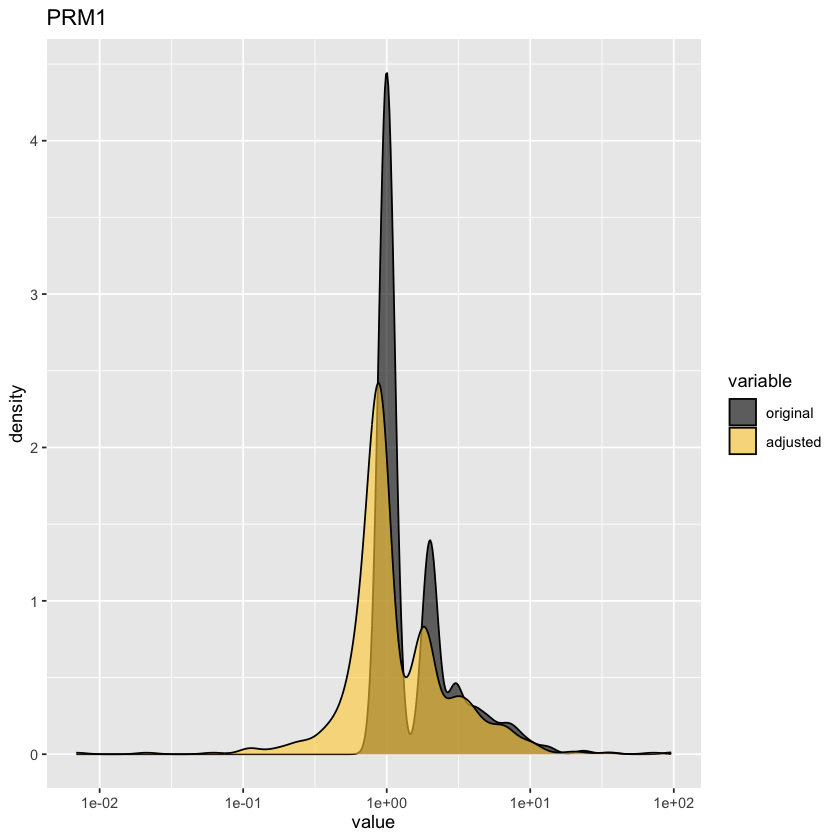

In [24]:
comp_prm1 <- data.frame(
    original = t(toc)[row.names(toc) == "PRM1"],
    adjusted = t(out)[row.names(out) == "PRM1"]
)
ggplot(melt(comp_prm1), aes(x = value, fill = variable)) + 
    geom_density(alpha = 0.6) + 
    scale_fill_manual(values = c("original" = "#000000", "adjusted" = "#FFCF3E")) +
    xlim(0, 10) + 
    scale_x_continuous(trans = "log10") + 
    ggtitle("PRM1")

In [26]:
# ---- PRM1 only (as before) ----
prm_pyED  <- as.numeric(toc["PRM1", ])
prm_adj_with_SoupX  <- as.numeric(out["PRM1", ])

pct_pyED  <- tapply(prm_pyED > 0, cluster_labels, mean)
pct_adj_with_SoupX  <- tapply(prm_adj_with_SoupX > 0, cluster_labels, mean)

med_pyED  <- tapply(prm_pyED, cluster_labels, median, na.rm=TRUE)
med_adj_with_SoupX  <- tapply(prm_adj_with_SoupX, cluster_labels, median, na.rm=TRUE)

total_pyED <- tapply(prm_pyED, cluster_labels, sum, na.rm=TRUE)
total_adj_with_SoupX <- tapply(prm_adj_with_SoupX, cluster_labels, sum, na.rm=TRUE)

mean_pyED <- tapply(prm_pyED, cluster_labels, mean, na.rm=TRUE)
mean_adj_with_SoupX <- tapply(prm_adj_with_SoupX, cluster_labels, mean, na.rm=TRUE)

# save the summary dataframe to 04_soup/
summary_df <- data.frame(cluster_labels = names(pct_pyED),
                         pct_pyED = pct_pyED,
                         pct_SoupX = pct_adj_with_SoupX,
                         med_pyED = med_pyED,
                         med_SoupX = med_adj_with_SoupX,
                         total_pyED = total_pyED,
                         total_SoupX = total_adj_with_SoupX,
                         mean_pyED = mean_pyED,
                         mean_SoupX = mean_adj_with_SoupX)

summary_df

write.csv(summary_df, file = "04_soup/PRM1_cluster_summary.csv", row.names = FALSE)

# ---- ALL GENES summarized PER CLUSTER (cell type) ----
# Here we summarize *total UMI/cell type* across all genes, so we see the total UMI reduction per cell type

# Set up cluster labels
clus <- as.character(cluster_labels)
names(clus) <- names(cluster_labels) # cell barcode named vector

# For the full count matrices, sum per cell
tot_umi_pyED_per_cell <- Matrix::colSums(toc)
tot_umi_SoupX_per_cell <- Matrix::colSums(out)

# Summarize per cell type (cluster): sum all cell UMI for each cluster label
total_UMI_pyED_per_cluster <- tapply(tot_umi_pyED_per_cell, clus, sum, na.rm=TRUE)
total_UMI_SoupX_per_cluster <- tapply(tot_umi_SoupX_per_cell, clus, sum, na.rm=TRUE)

# Also compute per-cell median, mean UMI per cell type
median_UMI_pyED_per_cluster <- tapply(tot_umi_pyED_per_cell, clus, median, na.rm=TRUE)
median_UMI_SoupX_per_cluster <- tapply(tot_umi_SoupX_per_cell, clus, median, na.rm=TRUE)
mean_UMI_pyED_per_cluster   <- tapply(tot_umi_pyED_per_cell, clus, mean, na.rm=TRUE)
mean_UMI_SoupX_per_cluster  <- tapply(tot_umi_SoupX_per_cell, clus, mean, na.rm=TRUE)

# Build summary dataframe
umi_cluster_summary <- data.frame(
  cluster = names(total_UMI_pyED_per_cluster),
  total_UMI_pyED = total_UMI_pyED_per_cluster,
  total_UMI_SoupX = total_UMI_SoupX_per_cluster,
  median_UMI_pyED = median_UMI_pyED_per_cluster,
  median_UMI_SoupX = median_UMI_SoupX_per_cluster,
  mean_UMI_pyED = mean_UMI_pyED_per_cluster,
  mean_UMI_SoupX = mean_UMI_SoupX_per_cluster
)

# Save per-cell-type UMI reduction summary
write.csv(umi_cluster_summary, file = "04_soup/totalUMI_cluster_summary.csv", row.names=FALSE)

# Print the summary
umi_cluster_summary


,cluster_labels,pct_pyED,pct_SoupX,med_pyED,med_SoupX,total_pyED,total_SoupX,mean_pyED,mean_SoupX
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Early Scytes,Early Scytes,0.9966216,0.0000000,27.5,0.000000,34134,0.000,57.65878,0.000000
Early Sgonia,Early Sgonia,1.0000000,0.0000000,20.0,0.000000,1571,0.000,42.45946,0.000000
Late Scytes,Late Scytes,0.9934641,0.2461874,17.0,0.000000,22278,8088.393,48.53595,17.621771
Later Stids,Later Stids,0.9729730,0.7685617,8.0,3.172461,51567,27655.616,16.01957,8.591369
Leydig,Leydig,0.9873897,0.0000000,11.0,0.000000,40626,0.000,25.61538,0.000000
Round Stids,Round Stids,0.9992194,0.9398907,93.0,57.243061,219890,143924.889,171.65496,112.353543
Sertoli,Sertoli,0.9941634,0.0000000,14.0,0.000000,45825,0.000,44.57685,0.000000


,cluster,total_UMI_pyED,total_UMI_SoupX,median_UMI_pyED,median_UMI_SoupX,mean_UMI_pyED,mean_UMI_SoupX
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Early Scytes,Early Scytes,5171290,3987064.6,6650.5,5520.8357,8735.2872,6734.9064
Early Sgonia,Early Sgonia,172269,132819.4,3825.0,3110.8121,4655.9189,3589.7135
Late Scytes,Late Scytes,1575571,1214765.2,2765.0,2332.3168,3432.6166,2646.5474
Later Stids,Later Stids,2689720,2073774.1,428.0,372.9769,835.5763,644.2293
Leydig,Leydig,4729521,3646460.7,2684.5,2220.4654,2982.0435,2299.1555
Round Stids,Round Stids,8546144,6589077.0,3329.0,2825.7751,6671.4629,5143.6979
Sertoli,Sertoli,5229271,4031767.9,3342.5,2872.3712,5086.8395,3921.9532


# saving result

In [ ]:
# save the out to h5
library(SingleCellExperiment)
library(zellkonverter)

# Create SCE object with corrected counts
sce_corrected <- SingleCellExperiment(assays = list(counts = out))

# Add cell metadata if available
if(exists("cluster_labels_v")) {
  colData(sce_corrected)$cluster_labels <- cluster_labels[colnames(out)]
}

# Save as H5AD
writeH5AD(sce_corrected, paste0("pyED_correct_soupx.h5ad"))

# Display the corrected matrix
out

ℹ Using the 'counts' assay as the X matrix

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]

  [[ suppressing 32 column names ‘AAACAGCCAATTGAGA-1’, ‘AAACAGCCAGTCTAGC-1’, ‘AAACAGCCATCAGCAC-1’ ... ]]



22037 x 8202 sparse Matrix of class "dgCMatrix"
                                                                                      
A1CF          .         .         .         .          .         .          .         
A2M           0.0000000 .         6.8324869 .          .         0.0000000 15.08003622
A2ML1         .         .         .         .          .         .          1.98010111
A3GALT2       .         .         .         .          .         .          .         
A4GALT        .         .         .         .          .         .          .         
A4GNT         .         .         .         .          .         .          .         
AAAS          .         .         .         .          .         .          .         
AACS          .         .         .         .          .         .          .         
AADAC         .         .         .         .          .         .          .         
AADACL2       .         .         .         .          .         .          .     

# (old) tried autoCont EXPLANATION

Error in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept): Contamination fraction greater than 1 detected.  This is impossible and likely represents a failure in the estimation procedure used.
Traceback:

1. suppressMessages(calculateContaminationFraction(sc, nonExpressedGeneList[i], 
 .     nullMat[, i, drop = FALSE], forceAccept = TRUE))
2. withCallingHandlers(expr, message = function(c) if (inherits(c, 
 .     classes)) tryInvokeRestart("muffleMessage"))
3. calculateContaminationFraction(sc, nonExpressedGeneList[i], nullMat[, 
 .     i, drop = FALSE], forceAccept = TRUE)
4. setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept)
5. stop("Contamination fraction greater than 1 detected.  This is impossible and likely represents a failure in the estimation procedure used.")
6. .handleSimpleError(function (cnd) 
 . {
 .     watcher$capture_plot_and_output()
 .     cnd <- sanitize_call(cnd)
 .     watcher$push(cnd)
 .     switch(on_error, continue = invokeRestart("eval_continue"), 
 .         stop = invokeRestart("eval_stop"), error = NULL)
 . }, "Contamination fraction greater than 1 detected.  This is impossible and likely represents a failure in the estimation procedure used.", 
 .     base::quote(setContaminationFraction(sc, exp(coef(sc$fit)), 
 .         forceAccept = forceAccept)))


 - error described in 
 https://github.com/constantAmateur/SoupX/issues/154

 - also no solution in
 https://github.com/constantAmateur/SoupX/issues/64

In [ ]:
# use the genelist and make it a list
#("nonExpressedGeneList must be a list of sets of genes.  e.g. list(HB = c('HBB','HBA2'))")
typeof(rownames(genelist))
typeof("ID4")
genes <- list(
  spermatogonia = c("ID4", "GFRA1", "ZBTB16", "NANOS2", "UTF1", "SALL4", "DMRT1", "SOHLH1", "SOHLH2"),
  spermatocytes = c("STRA8", "DMRT6", "SYCP1", "SYCP2", "SYCP3", "HORMAD1", "HORMAD2", "TEX101", "MLH1"),
  round_spermatids = c("ACRV1", "CRISP2", "GSTM3", "SPATA16", "SPATA22"),
  elongated_spermatids = c("PRM1", "PRM2", "TNP1", "TNP2", "GSTM3", "CRISP2", "OAZ3", "SPATA16"),
  leydig_cells = c("CYP17A1", "CYP11A1", "HSD3B1", "HSD17B3", "STAR", "INSL3", "NR5A1", "PDGFRA", "NR2F2"),
  sertoli_cells = c("SOX9", "AMH", "GATA4", "WT1", "INHA", "CLDN11", "VIM", "TF", "RBP1", "FSHR"),
  peritubular_cells = c("ACTA2", "MYH11", "CNN1", "TAGLN", "PDGFRB", "DES", "CSPG4")
)
genes

# ensure to remove genes that are not present in the data
genes <- lapply(genes, function(x) x[x %in% rownames(toc)])

genes

plotMarkerDistribution(sc, genes)

[1] "character"

[1] "character"

$spermatogonia
[1] "ID4"    "GFRA1"  "ZBTB16" "NANOS2" "UTF1"   "SALL4"  "DMRT1"  "SOHLH1"
[9] "SOHLH2"

$spermatocytes
[1] "STRA8"   "DMRT6"   "SYCP1"   "SYCP2"   "SYCP3"   "HORMAD1" "HORMAD2"
[8] "TEX101"  "MLH1"   

$round_spermatids
[1] "ACRV1"   "CRISP2"  "GSTM3"   "SPATA16" "SPATA22"

$elongated_spermatids
[1] "PRM1"    "PRM2"    "TNP1"    "TNP2"    "GSTM3"   "CRISP2"  "OAZ3"   
[8] "SPATA16"

$leydig_cells
[1] "CYP17A1" "CYP11A1" "HSD3B1"  "HSD17B3" "STAR"    "INSL3"   "NR5A1"  
[8] "PDGFRA"  "NR2F2"  

$sertoli_cells
 [1] "SOX9"   "AMH"    "GATA4"  "WT1"    "INHA"   "CLDN11" "VIM"    "TF"    
 [9] "RBP1"   "FSHR"  

$peritubular_cells
[1] "ACTA2"  "MYH11"  "CNN1"   "TAGLN"  "PDGFRB" "DES"    "CSPG4"

$spermatogonia
[1] "ID4"    "GFRA1"  "ZBTB16" "NANOS2" "SALL4"  "DMRT1"  "SOHLH2"

$spermatocytes
[1] "STRA8"   "SYCP1"   "SYCP2"   "SYCP3"   "HORMAD1" "HORMAD2" "TEX101" 
[8] "MLH1"   

$round_spermatids
[1] "ACRV1"   "CRISP2"  "GSTM3"   "SPATA16" "SPATA22"

$elongated_spermatids
[1] "PRM1"    "PRM2"    "TNP1"    "TNP2"    "GSTM3"   "CRISP2"  "OAZ3"   
[8] "SPATA16"

$leydig_cells
[1] "CYP17A1" "CYP11A1" "HSD17B3" "STAR"    "INSL3"   "NR5A1"   "PDGFRA" 
[8] "NR2F2"  

$sertoli_cells
 [1] "SOX9"   "AMH"    "GATA4"  "WT1"    "INHA"   "CLDN11" "VIM"    "TF"    
 [9] "RBP1"   "FSHR"  

$peritubular_cells
[1] "ACTA2"  "MYH11"  "CNN1"   "TAGLN"  "PDGFRB" "DES"    "CSPG4"

No clusters found or supplied, using every cell as its own cluster.



ERROR: Error in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept): Contamination fraction greater than 1 detected.  This is impossible and likely represents a failure in the estimation procedure used.
